# DALI Data Challenge

## 1. Data Visualization

In [6]:
%matplotlib ipympl 

import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
import matplotlib.dates as mdates
import shapefile as shp
import seaborn as sns
import geopandas as gpd
import geoplot as gplt
import geoplot.crs as gcrs
import mapclassify as mc
import matplotlib

In [7]:
# Setting Colors and Defaults 
lightblue='#8ecae6'
navy='#003049'
grey='#8d99ae'
red='#c1121f'
darkred='#38040e'

colors=['#FFFFFF', navy]
colors_theme = [darkred, red, lightblue, navy, grey]

cmap_navy = matplotlib.colors.LinearSegmentedColormap.from_list('Navys', colors=colors, N=256, gamma=1.0)

sns.set_style('white')
# plt.style.use('white')
sns.set_palette(colors_theme)

plt.rcParams['font.size'] = 10
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 10
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 12

In [31]:
# Reading in the dataframe and making new columns for easier plotting 
df = pd.read_csv('superstore.csv')
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])
df.sort_values(by='Order Date', inplace = True) 
df['Region'].unique()
df['Order Year-Month'] = df['Order Date'].map(lambda dt: dt.strftime('%Y-%m'))

df['Order Year-Week'] = df['Order Date'].dt.strftime('%Y-%V')

# reference documentation: https://pandas.pydata.org/docs/reference/api/pandas.Grouper.html
weekly_data = df.groupby([pd.Grouper(key='Order Date', freq='W')])['Quantity'].sum()

# Making a weekday column 
weekday_list = []
for x in df['Order Date']:
    y = x.weekday()
    weekday_list.append(y)
    
df['Weekday'] = weekday_list

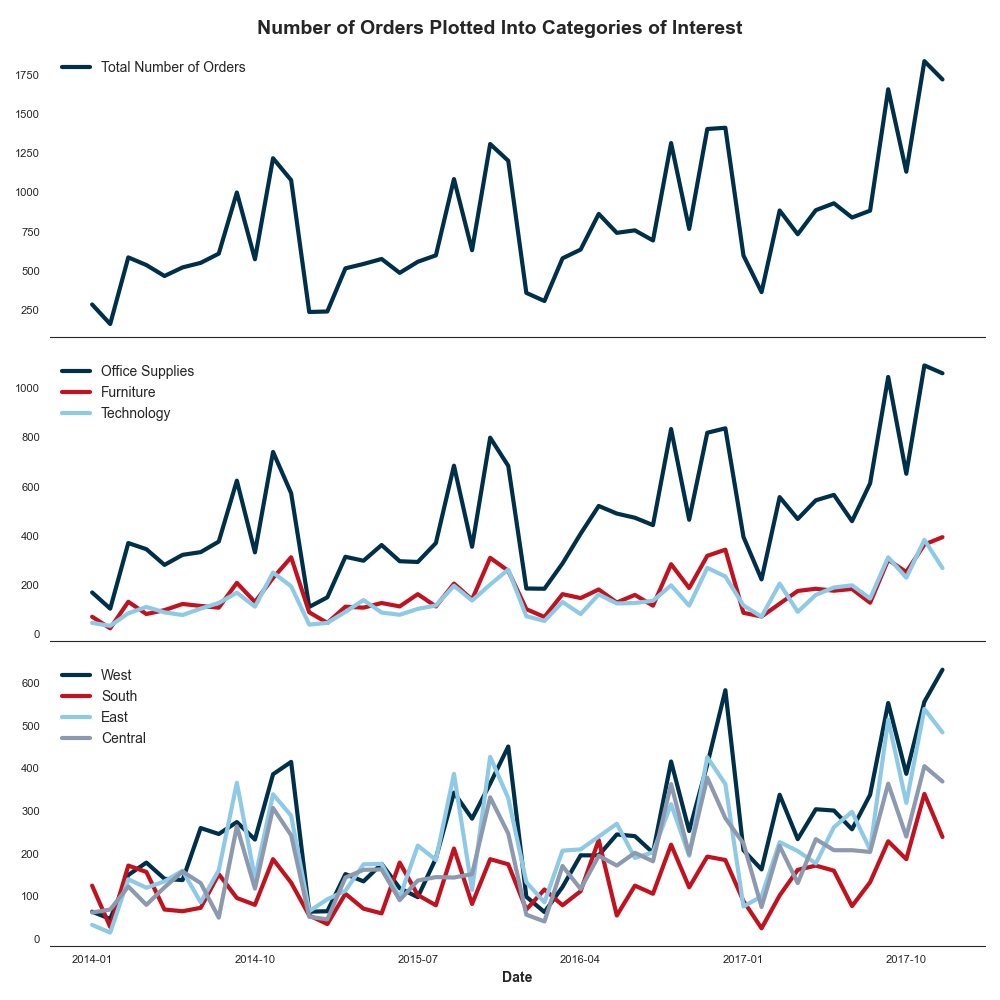

In [9]:
fig, axs = plt.subplots(3, sharex=True, figsize=(10,10))
fig.suptitle('Number of Orders Plotted Into Categories of Interest', fontsize=14,  weight='bold')
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=9))
axs[0].plot(df['Order Year-Month'].unique(), df.groupby('Order Year-Month')['Quantity'].aggregate('sum'), label='Total Number of Orders', color=navy, lw=3)  
axs[2].set_xlabel('Date')

axs[1].plot(df[(df['Category']=='Office Supplies')]['Order Year-Month'].unique(), df[(df['Category']=='Office Supplies')].groupby('Order Year-Month')['Quantity'].aggregate('sum'), color=navy, lw=3, label='Office Supplies') 
axs[1].plot(df[(df['Category']=='Furniture')]['Order Year-Month'].unique(), df[(df['Category']=='Furniture')].groupby('Order Year-Month')['Quantity'].aggregate('sum'), color=red, lw=3, label='Furniture') 
axs[1].plot(df[(df['Category']=='Technology')]['Order Year-Month'].unique(), df[(df['Category']=='Technology')].groupby('Order Year-Month')['Quantity'].aggregate('sum'), color=lightblue, lw=3, label='Technology') 

axs[2].plot(df[(df['Region']=='West')]['Order Year-Month'].unique(), df[(df['Region']=='West')].groupby('Order Year-Month')['Quantity'].aggregate('sum'), color=navy, lw=3, label='West')
axs[2].plot(df[(df['Region']=='South')]['Order Year-Month'].unique(), df[(df['Region']=='South')].groupby('Order Year-Month')['Quantity'].aggregate('sum'), color=red, lw=3, label='South')    
axs[2].plot(df[(df['Region']=='East')]['Order Year-Month'].unique(), df[(df['Region']=='East')].groupby('Order Year-Month')['Quantity'].aggregate('sum'), color=lightblue, lw=3, label='East')    
axs[2].plot(df[(df['Region']=='Central')]['Order Year-Month'].unique(), df[(df['Region']=='Central')].groupby('Order Year-Month')['Quantity'].aggregate('sum'), color=grey, lw=3, label='Central')    

axs[0].legend(loc='upper left', frameon=False)
axs[1].legend(loc='upper left', frameon=False)
axs[2].legend(loc='upper left', frameon=False)
sns.despine(top=True, right=True, left=True)
plt.tight_layout()
# plt.savefig("plots/categories.png", format="png", bbox_inches='tight', dpi=1200)
plt.show()

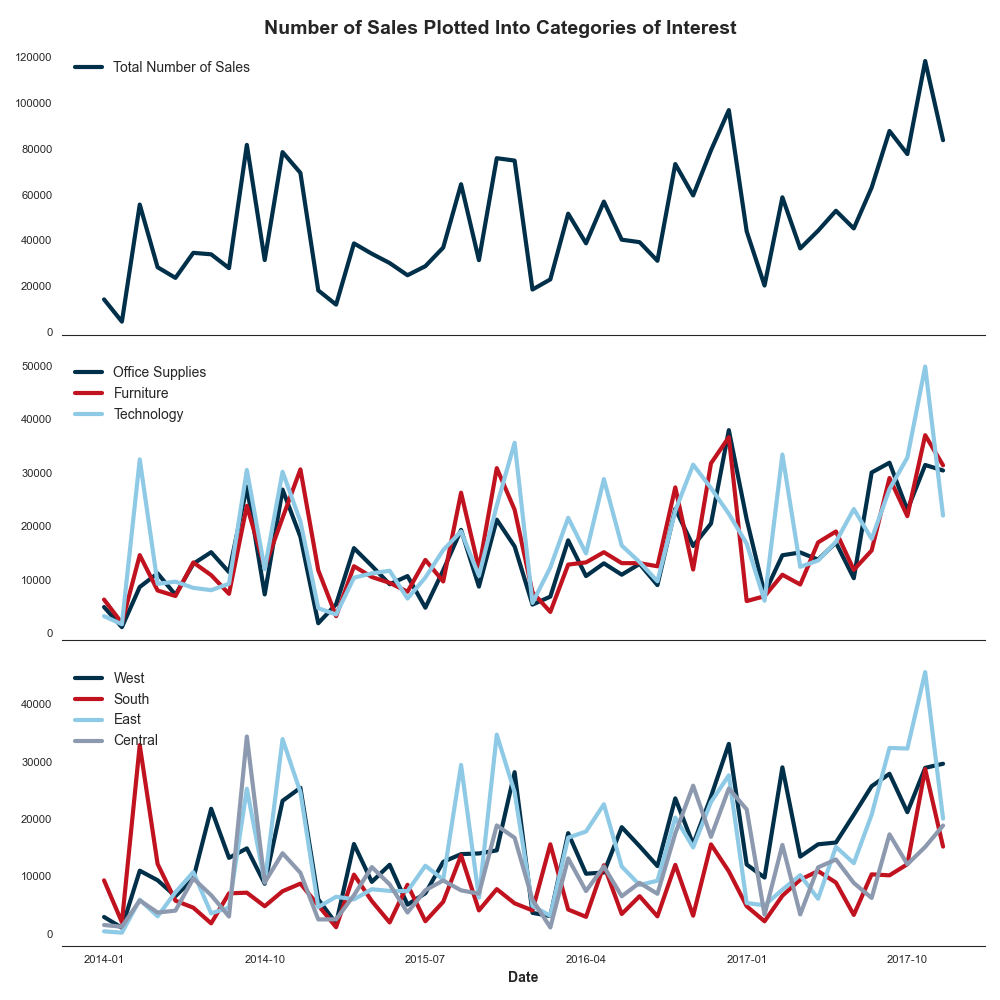

In [10]:
fig, axs = plt.subplots(3, sharex=True, figsize=(10,10))
fig.suptitle('Number of Sales Plotted Into Categories of Interest', fontsize=14,  weight='bold')
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=9))
axs[0].plot(df['Order Year-Month'].unique(), df.groupby('Order Year-Month')['Sales'].aggregate('sum'), label='Total Number of Sales', color=navy, lw=3)  
axs[2].set_xlabel('Date')

axs[1].plot(df[(df['Category']=='Office Supplies')]['Order Year-Month'].unique(), df[(df['Category']=='Office Supplies')].groupby('Order Year-Month')['Sales'].aggregate('sum'), color=navy, lw=3, label='Office Supplies') 
axs[1].plot(df[(df['Category']=='Furniture')]['Order Year-Month'].unique(), df[(df['Category']=='Furniture')].groupby('Order Year-Month')['Sales'].aggregate('sum'), color=red, lw=3, label='Furniture') 
axs[1].plot(df[(df['Category']=='Technology')]['Order Year-Month'].unique(), df[(df['Category']=='Technology')].groupby('Order Year-Month')['Sales'].aggregate('sum'), color=lightblue, lw=3, label='Technology') 

axs[2].plot(df[(df['Region']=='West')]['Order Year-Month'].unique(), df[(df['Region']=='West')].groupby('Order Year-Month')['Sales'].aggregate('sum'), color=navy, lw=3, label='West')
axs[2].plot(df[(df['Region']=='South')]['Order Year-Month'].unique(), df[(df['Region']=='South')].groupby('Order Year-Month')['Sales'].aggregate('sum'), color=red, lw=3, label='South')    
axs[2].plot(df[(df['Region']=='East')]['Order Year-Month'].unique(), df[(df['Region']=='East')].groupby('Order Year-Month')['Sales'].aggregate('sum'), color=lightblue, lw=3, label='East')    
axs[2].plot(df[(df['Region']=='Central')]['Order Year-Month'].unique(), df[(df['Region']=='Central')].groupby('Order Year-Month')['Sales'].aggregate('sum'), color=grey, lw=3, label='Central')    

axs[0].legend(loc='upper left', frameon=False)
axs[1].legend(loc='upper left', frameon=False)
axs[2].legend(loc='upper left', frameon=False)
sns.despine(top=True, right=True, left=True)
plt.tight_layout()
# plt.savefig("plots/categories.png", format="png", bbox_inches='tight', dpi=1200)
plt.show()

Here I am graphing the time series of orders using categories I found important from the columns. They share an x-axis and show variance in sales across region and category of product. 

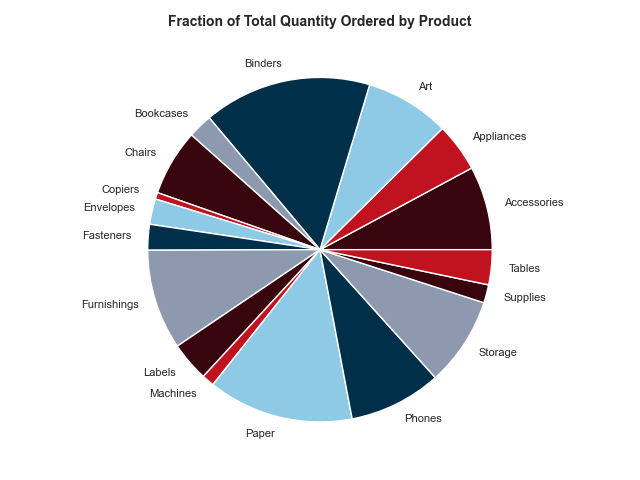

In [11]:
# Pie charts!
# df.groupby(['Sub-Category'])['Quantity'].aggregate('sum').plot(kind='pie', ylabel='')
fig, ax = plt.subplots()
ax.pie(df.groupby(['Sub-Category'])['Quantity'].aggregate('sum'), labels=df.groupby(['Sub-Category'])['Quantity'].aggregate('sum').index)
ax.set_ylabel=('')
ax.set_title('Fraction of Total Quantity Ordered by Product', weight='bold')
plt.tight_layout()
plt.savefig("plots/pie.png", format="png", bbox_inches='tight', dpi=1200)
plt.show()

This pie chart is a useful way to show all the products being sold and which ones take up the largest market share. Here we can see that binders, paper, and phones are purchased the most. 

In [33]:
# Here I am setting up the datasets to be graphed on a map! Thanks geoplot! 
# database source: https://simplemaps.com/data/us-cities
usa_cities = pd.read_csv('uscities.csv') # here I imported a csv of cities found online 
usa_cities = gpd.GeoDataFrame(usa_cities, geometry=gpd.points_from_xy(usa_cities.lng, usa_cities.lat))
usa_cities = usa_cities.query('state_id not in ["AK", "HI", "PR"]') # remove states outside of the contiguous us 

usa = gpd.read_file(gplt.datasets.get_path('contiguous_usa')) # from geoplot library 

# I am doing this to make sure that I avoid getting cities that are in the wrong state -- there are duplicately named cities in multiple places! 
df['City-State'] = df['City'] + '-' + df['State']
usa_cities['city'] = usa_cities['city'].replace({'New York': 'New York City'}) # this is so New York will match up when we merge the sets -- I didn't see any other issues when looking around 
usa_cities['City-State'] = usa_cities['city'] +'-' + usa_cities['state_name']

# sales by states and cities 
city_sales = df.groupby(['City-State'], as_index=False).aggregate(({'Sales': 'sum', 'State': 'first', 'City': 'first'}))
state_sales = df.groupby(['State'], as_index=False)['Sales'].aggregate('sum')


# result = for cities and result_state = for states 
result = usa_cities.set_index('City-State').join(city_sales.set_index('City-State'))
result_state = usa.set_index('state').join(state_sales.set_index('State'))
result = result.fillna(0) # to get rid of NaN values in quantity 
result = result[(result['Sales'] > 0)]
result['Sales'] = result['Sales'].astype(int)

/Users/kpomm/opt/anaconda3/envs/phys31/lib/python3.9/site-packages/geoplot/geoplot.py:248: UserWarning:

Please specify "legend_var" explicitly when both "hue" and "scale" are specified. Defaulting to "legend_var='hue'".

/Users/kpomm/opt/anaconda3/envs/phys31/lib/python3.9/site-packages/cartopy/crs.py:245: ShapelyDeprecationWarning:

__len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.

/Users/kpomm/opt/anaconda3/envs/phys31/lib/python3.9/site-packages/cartopy/crs.py:297: ShapelyDeprecationWarning:

Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.

/Users/kpomm/opt/anaconda3/envs/phys31/lib/python3.9/site-packages/cartopy/crs.py:364: ShapelyDeprecationWarning:

__len__ for multi-part geometries is deprecated and will be removed in Sha

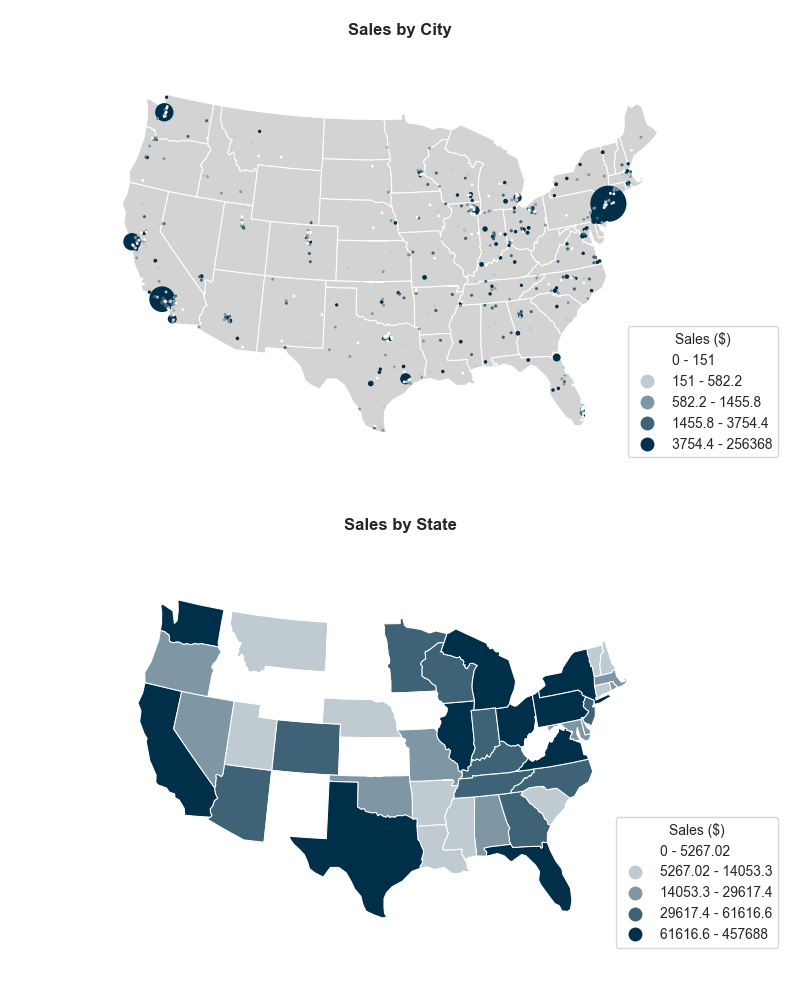

In [35]:
# plot with subplots 
fig, axarr = plt.subplots(nrows=2, ncols=1, figsize=(8, 10), subplot_kw={
    'projection': gcrs.AlbersEqualArea(central_longitude=-98, central_latitude=39.5)})

scheme = mc.Quantiles(result['Sales'], k=5) # five shades of color used 

# first plot is for cities 
# reference documentation for what this is based off of: https://residentmario.github.io/geoplot/gallery/plot_largest_cities_usa.html
# also used: https://geopandas.org/en/stable/gallery/plotting_with_geoplot.html

# of course transformed this to my own data 
ax1 = gplt.polyplot(
    usa,
    linewidth=0.75,
    edgecolor='white',
    facecolor='lightgray',
    ax=axarr[0]
)

ax1.set_title('Sales by City', fontsize=12, weight='bold')
gplt.pointplot(
    result, 
    limits=(1, 25),
    scale='Sales',
    hue='Sales',
    cmap=cmap_navy,
    scheme=scheme,
    legend=True,
    legend_kwargs={'bbox_to_anchor': (1, 0.35), 'title':'Sales ($)'},
    ax=axarr[0]
    )

# now we graph by state 
state_scheme = mc.Quantiles(result_state['Sales'], k=5) # five shades of color used 

# a chloropleth makes sense here 
ax2 = gplt.choropleth(
    result_state,
    linewidth=0.75,
    hue='Sales',
    cmap=cmap_navy,
    scheme=state_scheme,
    legend=True,
    legend_kwargs={'bbox_to_anchor': (1, 0.35), 'title':'Sales ($)'},
    ax=axarr[1]
)

ax2.set_title('Sales by State', fontsize=12, weight='bold')
plt.tight_layout()
plt.savefig("plots/bothmaps.png", format="png", bbox_inches='tight', dpi=1200)
plt.show()

In [14]:
import plotly.graph_objects as go

# Initial code gathered from plotly documentation -- I modified this to my liking for my data 
# source: https://plotly.com/python/choropleth-maps/ -- I used the 2011 agriculture exports code as a starting point 
import pandas as pd
df2 = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2011_us_ag_exports.csv')

result_state = df2.set_index('state').join(state_sales.set_index('State'))
result_state = result_state.fillna(0) # to get rid of NaN values in quantity 

fig = go.Figure(data=go.Choropleth(
    locations=result_state['code'], 
    z = result_state['Sales'].astype(float), 
    locationmode = 'USA-states', 
    colorscale = 'Blues',
    colorbar_title = 'Number of Sales',
))

fig.update_layout(
    title_text = 'Quantity Ordered by State',
    geo_scope='usa', # limite map scope to USA
)

fig.show()

/var/folders/bz/ffk4_7b14dxf9m9bxxr_6xfw0000gn/T/ipykernel_97933/2117371432.py:12: UserWarning:

FixedFormatter should only be used together with FixedLocator



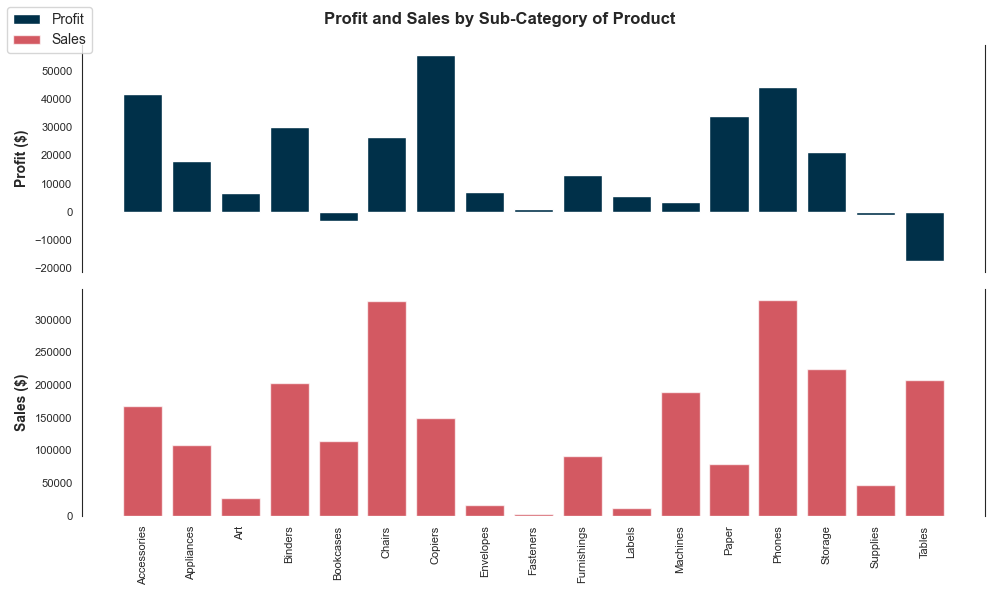

In [36]:
# Bar graph to show the profit and discount for each product 

fig, axs = plt.subplots(2, sharex=True, figsize=(10,6))

fig.suptitle('Profit and Sales by Sub-Category of Product', fontsize=12, weight='bold')
axs[0].bar(df.groupby('Sub-Category')['Profit'].aggregate('sum').index, df.groupby('Sub-Category')['Profit'].aggregate('sum').values, color=navy, alpha=1, label='Profit')
axs[0].set_ylabel('Profit ($)')


axs[1].bar(df.groupby('Sub-Category')['Sales'].aggregate('sum').index, df.groupby('Sub-Category')['Sales'].aggregate('sum'), color=red, alpha=0.7, label='Sales')
axs[1].set_ylabel('Sales ($)', rotation=90)
axs[1].set_xticklabels(df.groupby('Sub-Category')['Profit'].aggregate('sum').index, rotation = 90)


fig.legend(loc='upper left')
    
sns.despine(top=True, bottom=True, right=False)
plt.tight_layout()
plt.savefig("plots/profsale.png", format="png", bbox_inches='tight', dpi=1200)
plt.show()

/var/folders/bz/ffk4_7b14dxf9m9bxxr_6xfw0000gn/T/ipykernel_97933/3375253783.py:12: UserWarning:

FixedFormatter should only be used together with FixedLocator



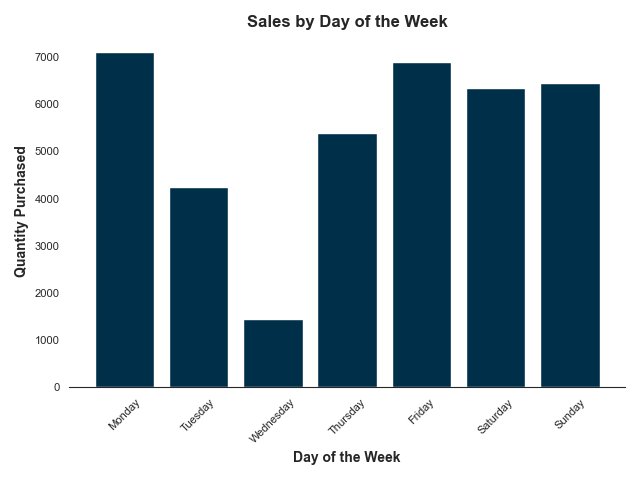

In [16]:
# Show sales trends by the day of week 

weekday_data = df.groupby('Weekday')['Quantity'].aggregate('sum')

fig,ax = plt.subplots()

ax.bar(weekday_data.index, weekday_data.values, color=navy)
ax.set_title('Sales by Day of the Week', fontsize=12, weight='bold')
ax.set_ylabel('Quantity Purchased')
ax.set_xlabel('Day of the Week')

ax.set_xticklabels(['Monday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], rotation=45)
sns.despine(top=True, right=True, left=True)
plt.tight_layout()
plt.savefig("plots/doweek.png", format="png", bbox_inches='tight', dpi=1200)
plt.show()

## 2. Prophet

In [21]:
from prophet import Prophet

In [30]:
# The next few cells of code are were based off the prophet documentation as a starting point 
# documentation: https://facebook.github.io/prophet/docs/quick_start.html

data = pd.DataFrame() # new dataframe with weekly timeseries data  
data['ds'] = weekly_data.index
data['y'] = weekly_data.values

test_amount = 52

train = data.iloc[:-test_amount]
test = data.iloc[-test_amount:]

train = train.reset_index(drop = True)
test = test.reset_index(drop = True)

In [27]:
m = Prophet()
m.fit(train)

16:53:33 - cmdstanpy - INFO - Chain [1] start processing
16:53:33 - cmdstanpy - INFO - Chain [1] done processing


In [28]:
# create forecast
from prophet.plot import plot_plotly, plot_components_plotly
from prophet.plot import add_changepoints_to_plot
from statsmodels.tools.eval_measures import rmse

future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)

predictions = forecast.iloc[-len(test):]['yhat']
actual = test['y']

print("RMSE: " + str(rmse(predictions, actual)))
fig = plot_plotly(m, forecast)
fig.update_layout( # from plotly documentation 
    title_text = 'Prophet Predictions Based on Weekly Data',
    colorway=colors_theme   
)

# from plotly documentation 
fig.update_traces(line_color=navy, marker_color=grey)

RMSE: 173.3344155008966


In [ ]:
fig = plot_components_plotly(m, forecast)
fig.update_layout(
    title_text = 'Trends and Seasonality',
    colorway=colors_theme   
)
fig.update_traces(line_color=navy, )

/Users/kpomm/opt/anaconda3/envs/phys31/lib/python3.9/site-packages/plotly/io/_json.py:534: UserWarning:

Discarding nonzero nanoseconds in conversion.



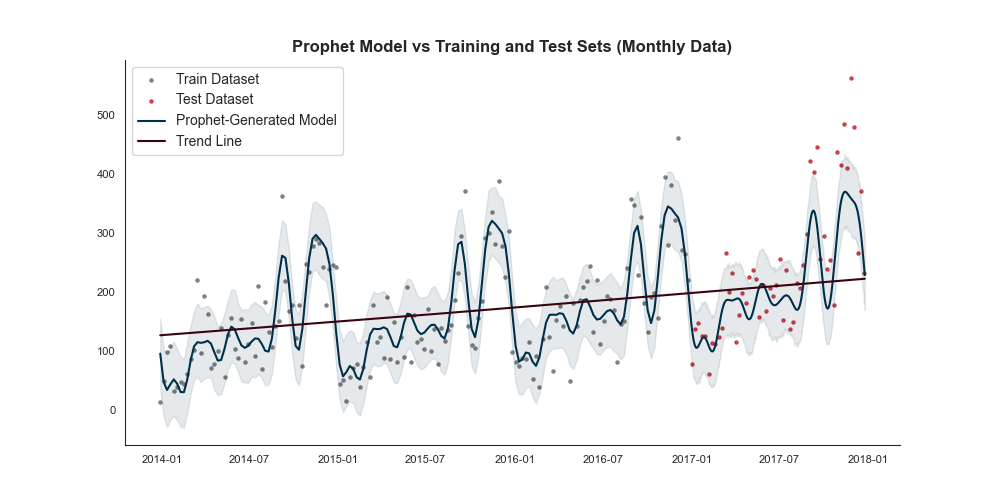

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))

ax.set_title('Prophet Model vs Training and Test Sets (Monthly Data)', fontsize=12, weight='bold')
ax.scatter(train['ds'], train['y'], color='grey', s=5, alpha=1, label='Train Dataset')
ax.scatter(test['ds'], test['y'], color=red, s=5, alpha=0.7, label='Test Dataset')
ax.plot(forecast['ds'], forecast['yhat'], color=navy, label='Prophet-Generated Model')
ax.plot(forecast['ds'], forecast['trend'], color=darkred, label='Trend Line')
ax.legend(loc='upper left')
sns.despine(top=True, right=True)
plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'],
                 color=navy, alpha=0.1)
plt.savefig("plots/modelvtraining-month.png", format="png", bbox_inches='tight', dpi=1200)
plt.show()

## 3. Archives

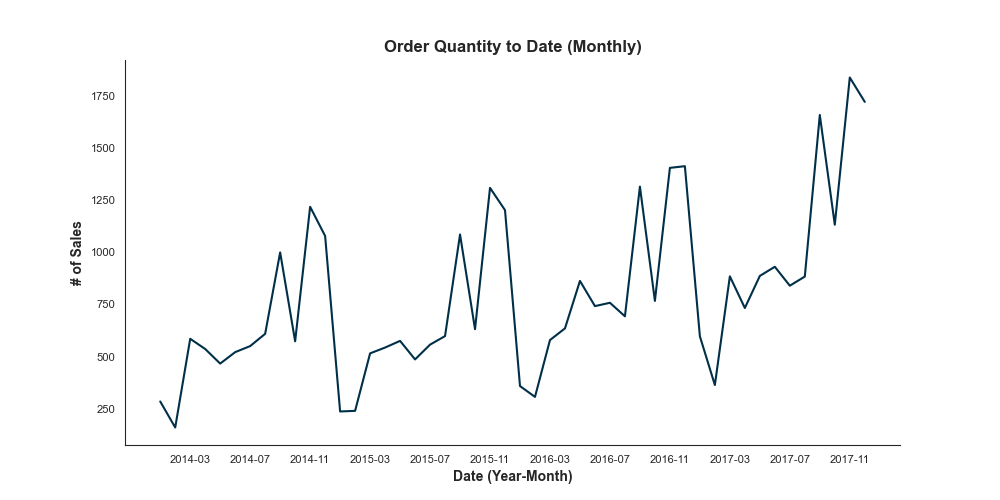

In [ ]:
# All sales plotted
plt.figure(figsize=(10, 5))
plt.plot(df['Order Year-Month'].unique(), df.groupby('Order Year-Month')['Quantity'].aggregate('sum'), label='All Sales', color=navy)  

# set an x tick every 9 months 
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=4))

plt.title('Order Quantity to Date (Monthly)', fontsize=12, weight='bold')
plt.xlabel('Date (Year-Month)') 
# plt.xticks(rotation=90)
plt.ylabel('# of Sales') 
sns.despine(top=True, right=True)

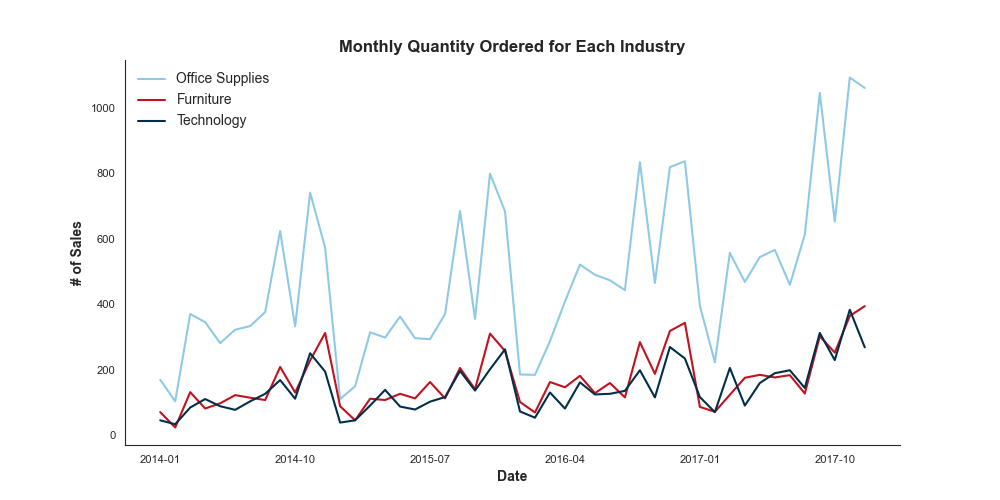

In [ ]:
# Sales by Industry
plt.figure(figsize=(10, 5))
plt.plot(df[(df['Category']=='Office Supplies')]['Order Year-Month'].unique(), df[(df['Category']=='Office Supplies')].groupby('Order Year-Month')['Quantity'].aggregate('sum'), color=lightblue, label='Office Supplies') 
plt.plot(df[(df['Category']=='Furniture')]['Order Year-Month'].unique(), df[(df['Category']=='Furniture')].groupby('Order Year-Month')['Quantity'].aggregate('sum'), color=red, label='Furniture') 
plt.plot(df[(df['Category']=='Technology')]['Order Year-Month'].unique(), df[(df['Category']=='Technology')].groupby('Order Year-Month')['Quantity'].aggregate('sum'), color=navy, label='Technology') 

plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=9))

plt.title('Monthly Quantity Ordered for Each Industry', fontsize=12, weight='bold')
plt.xlabel('Date') 
plt.ylabel('# of Sales') 
plt.legend(loc='upper left')
sns.despine(top=True, right=True)
plt.legend(frameon=False)


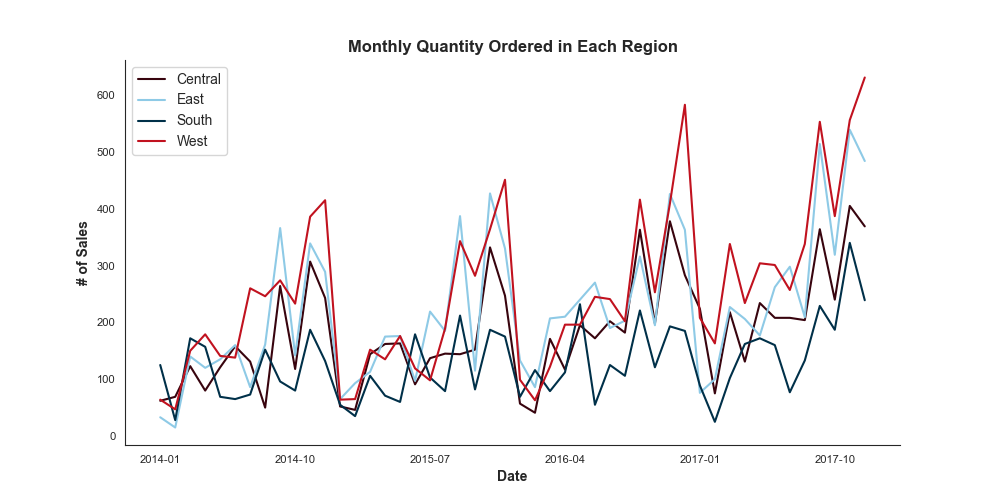

In [ ]:
# Sales by Region
plt.figure(figsize=(10, 5))

plt.plot(df[(df['Region']=='Central')]['Order Year-Month'].unique(), df[(df['Region']=='Central')].groupby('Order Year-Month')['Quantity'].aggregate('sum'), color=darkred, label='Central') 
plt.plot(df[(df['Region']=='East')]['Order Year-Month'].unique(), df[(df['Region']=='East')].groupby('Order Year-Month')['Quantity'].aggregate('sum'), color=lightblue, label='East')  
plt.plot(df[(df['Region']=='South')]['Order Year-Month'].unique(), df[(df['Region']=='South')].groupby('Order Year-Month')['Quantity'].aggregate('sum'), color=navy, label='South')   
plt.plot(df[(df['Region']=='West')]['Order Year-Month'].unique(), df[(df['Region']=='West')].groupby('Order Year-Month')['Quantity'].aggregate('sum'), color=red, label='West') 

plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=9))

plt.title('Monthly Quantity Ordered in Each Region', fontsize=12, weight='bold' )
plt.xlabel('Date') 
plt.ylabel('# of Sales') 
plt.legend(loc='upper left')
# plt.grid(alpha=.4)
sns.despine(top=True, right=True)

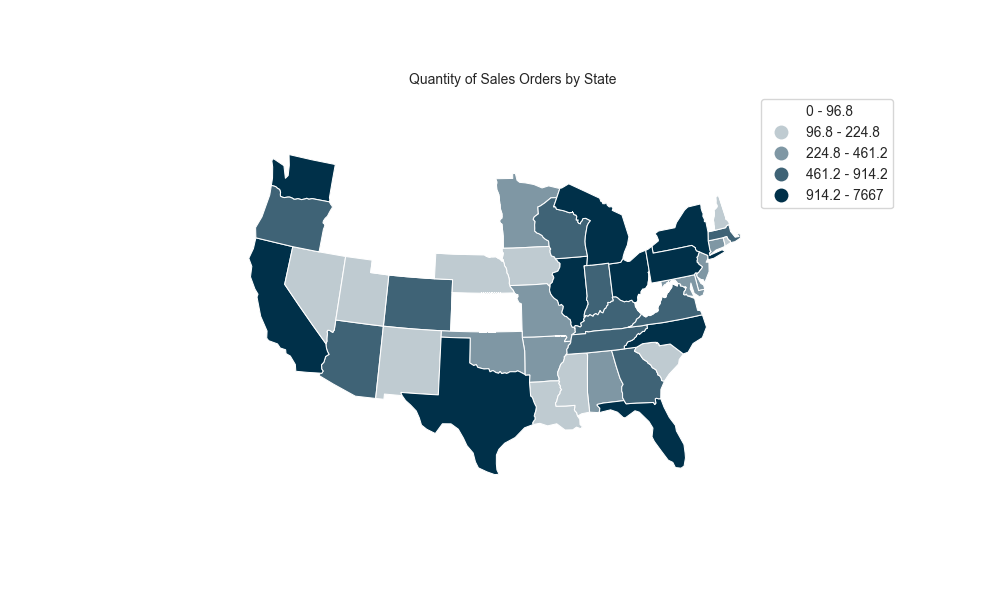

In [ ]:
# now we graph by state 
state_scheme = mc.Quantiles(result_state['Quantity'], k=5) # seven shades of color used 


ax = gplt.choropleth(
    result_state,
    projection=gcrs.AlbersEqualArea(central_longitude=-98, central_latitude=39.5),
    linewidth=0.75,
    hue='Quantity',
    cmap=cmap_navy,
    scheme=state_scheme,
    legend=True,
    figsize=(10, 6)
)

ax.set_title('Quantity of Sales Orders by State')
plt.savefig("plots/map.png", format="png", bbox_inches='tight', dpi=1200)
plt.show()

/Users/kpomm/opt/anaconda3/envs/phys31/lib/python3.9/site-packages/geoplot/geoplot.py:248: UserWarning:

Please specify "legend_var" explicitly when both "hue" and "scale" are specified. Defaulting to "legend_var='hue'".

/Users/kpomm/opt/anaconda3/envs/phys31/lib/python3.9/site-packages/cartopy/crs.py:245: ShapelyDeprecationWarning:

__len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.

/Users/kpomm/opt/anaconda3/envs/phys31/lib/python3.9/site-packages/cartopy/crs.py:297: ShapelyDeprecationWarning:

Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.

/Users/kpomm/opt/anaconda3/envs/phys31/lib/python3.9/site-packages/cartopy/crs.py:364: ShapelyDeprecationWarning:

__len__ for multi-part geometries is deprecated and will be removed in Sha

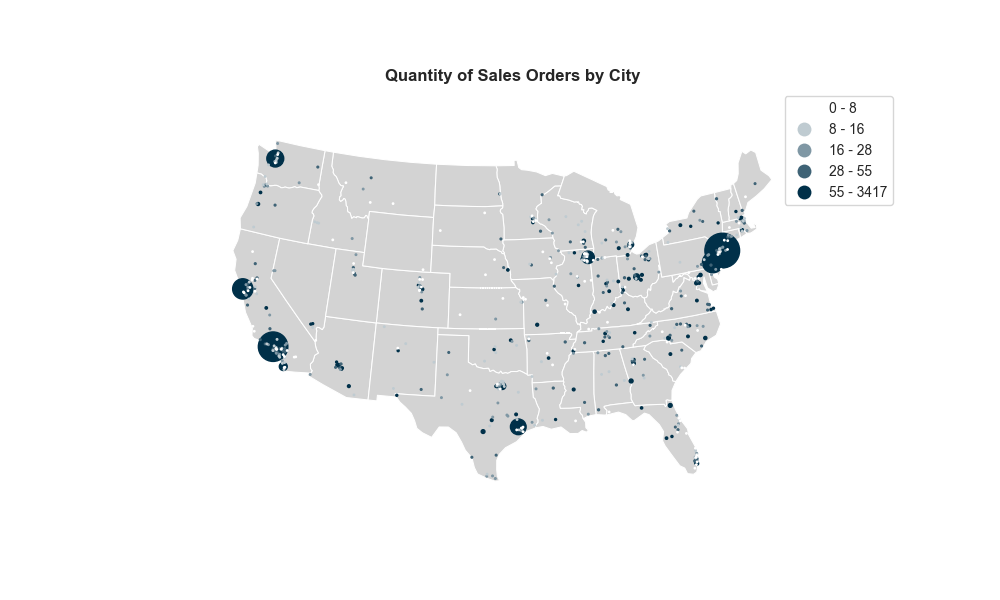

In [ ]:
scheme = mc.Quantiles(result['Quantity'], k=5) # seven shades of color used 

# cartogram -- plots the sales based on state on a map! 
ax = gplt.polyplot(
    usa,
    projection=gcrs.AlbersEqualArea(central_longitude=-98, central_latitude=39.5),
    linewidth=0.75,
    edgecolor='white',
    facecolor='lightgray',
    figsize=(10, 6)
)

ax.set_title('Quantity of Sales Orders by City', fontsize=12, weight='bold')
gplt.pointplot(
    result, 
    limits=(1, 25),
    scale='Quantity',
    hue='Quantity',
    cmap=cmap_navy,
    scheme=scheme,
    legend=True,
    ax=ax
    )

plt.savefig("plots/map.png", format="png", bbox_inches='tight', dpi=1200)
plt.show()